In [48]:
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression  
import csv          
import requests     
import numpy as np  
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from sklearn import metrics





# Exploring and cleaning data

In [49]:
# Accessing dataset
cwd = os.getcwd() + '/dataset/loan_train.csv'

my_dataset = pd.read_csv(cwd)

print(my_dataset.dtypes)
my_dataset.head()


Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


### Cleaning rows with NaN and categorising data

In [50]:
# Cleaning rows with NaN
my_dataset_cleaned = my_dataset.dropna()
my_dataset_cleaned = my_dataset.dropna(axis=0)
my_dataset_cleaned = my_dataset.dropna().reset_index(drop=True)


# Transforming categorical data into int
# Gender | Male = 1 / Female = 2
my_dataset_cleaned.loc[my_dataset_cleaned['Gender'] == 'Male', 'Gender'] = 1 
my_dataset_cleaned.loc[my_dataset_cleaned['Gender'] == 'Female', 'Gender'] = 2 
my_dataset_cleaned['Gender'] = my_dataset_cleaned['Gender'].astype(int)

# Married | Yes = 1 / No = 0
my_dataset_cleaned.loc[my_dataset_cleaned['Married'] == 'Yes', 'Married'] = 1 
my_dataset_cleaned.loc[my_dataset_cleaned['Married'] == 'No', 'Married'] = 0
my_dataset_cleaned['Married'] = my_dataset_cleaned['Married'].astype(int)

# Dependents | +3 = 4
my_dataset_cleaned.loc[my_dataset_cleaned['Dependents'] == '3+', 'Dependents'] = 4 
my_dataset_cleaned['Dependents'] = my_dataset_cleaned['Dependents'].astype(int)

# Education | Graduated = 1 / Not Graduate = 0
my_dataset_cleaned.loc[my_dataset_cleaned['Education'] == 'Graduate', 'Education'] = 1
my_dataset_cleaned.loc[my_dataset_cleaned['Education'] == 'Not Graduate', 'Education'] = 0
my_dataset_cleaned['Education'] = my_dataset_cleaned['Education'].astype(int)

# Self_employed | Yes = 1 / No = 0
my_dataset_cleaned.loc[my_dataset_cleaned['Self_Employed'] == 'Yes', 'Self_Employed'] = 1 
my_dataset_cleaned.loc[my_dataset_cleaned['Self_Employed'] == 'No', 'Self_Employed'] = 0
my_dataset_cleaned['Self_Employed'] = my_dataset_cleaned['Self_Employed'].astype(int)

# Status (approval) | Y = 1 / N = 0
my_dataset_cleaned.loc[my_dataset_cleaned['Status'] == 'Y', 'Status'] = 1 
my_dataset_cleaned.loc[my_dataset_cleaned['Status'] == 'N', 'Status'] = 0
my_dataset_cleaned['Status'] = my_dataset_cleaned['Status'].astype(int)

In [51]:
my_dataset_cleaned.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,Urban,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,Rural,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,Urban,1
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,Urban,1
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,Urban,1
5,1,1,2,1,1,541700,419600.0,26700000,360.0,1.0,Urban,1
6,1,1,0,0,0,233300,151600.0,9500000,360.0,1.0,Urban,1
7,1,1,4,1,0,303600,250400.0,15800000,360.0,0.0,Semiurban,0
8,1,1,2,1,0,400600,152600.0,16800000,360.0,1.0,Urban,1
9,1,1,1,1,0,1284100,1096800.0,34900000,360.0,1.0,Semiurban,0


### Filterting most relevant columns

In [68]:
# Reducing dataset, getting only most important attributes
reduced_dataset = my_dataset_cleaned[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Loan_Amount', 'Credit_History', 'Status']]        

# Statistical information
print(reduced_dataset.describe())
print(reduced_dataset.info())

reduced_dataset.head(10)

Status
0 here
           Gender     Married  Dependents   Education  Self_Employed   
count  499.000000  499.000000  499.000000  499.000000     499.000000  \
mean     1.176353    0.649299    0.865731    0.791583       0.138277   
std      0.381502    0.477668    1.227205    0.406584       0.345536   
min      1.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    1.000000       0.000000   
50%      1.000000    1.000000    0.000000    1.000000       0.000000   
75%      1.000000    1.000000    2.000000    1.000000       0.000000   
max      2.000000    1.000000    4.000000    1.000000       1.000000   

       Applicant_Income   Loan_Amount  Credit_History      Status  
count      4.990000e+02  4.990000e+02      499.000000  499.000000  
mean       5.336128e+05  1.395251e+07        0.851703    0.683367  
std        5.618157e+05  8.345237e+06        0.355750    0.465630  
min        1.500000e+04  0.000000e+00        0.000000    0.000000

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Loan_Amount,Credit_History,Status
0,1,0,0,1,0,584900,15000000,1.0,1
1,1,1,1,1,0,458300,12800000,1.0,0
2,1,1,0,1,1,300000,6600000,1.0,1
3,1,1,0,0,0,258300,12000000,1.0,1
4,1,0,0,1,0,600000,14100000,1.0,1
5,1,1,2,1,1,541700,26700000,1.0,1
6,1,1,0,0,0,233300,9500000,1.0,1
7,1,1,4,1,0,303600,15800000,0.0,0
8,1,1,2,1,0,400600,16800000,1.0,1
9,1,1,1,1,0,1284100,34900000,1.0,0


### Data normalisation

In [53]:
df_normalised = reduced_dataset.loc[:, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Loan_Amount', 'Credit_History', 'Status']]

df_normalised['Applicant_Income'] = (df_normalised['Applicant_Income']-df_normalised['Applicant_Income'].min())/(df_normalised['Applicant_Income'].max()-df_normalised['Applicant_Income'].min())
df_normalised['Loan_Amount'] = (df_normalised['Loan_Amount']-df_normalised['Loan_Amount'].min())/(df_normalised['Loan_Amount'].max()-df_normalised['Loan_Amount'].min())

df_normalised.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Loan_Amount,Credit_History,Status
0,1,0,0,1,0,0.070489,0.250000,1.0,1
1,1,1,1,1,0,0.054830,0.213333,1.0,0
2,1,1,0,1,1,0.035250,0.110000,1.0,1
3,1,1,0,0,0,0.030093,0.200000,1.0,1
4,1,0,0,1,0,0.072356,0.235000,1.0,1
5,1,1,2,1,1,0.065145,0.445000,1.0,1
6,1,1,0,0,0,0.027001,0.158333,1.0,1
7,1,1,4,1,0,0.035696,0.263333,0.0,0
8,1,1,2,1,0,0.047693,0.280000,1.0,1
9,1,1,1,1,0,0.156970,0.581667,1.0,0


## Data visualization

### Plot on Applicant Income and Loan Amount

<Axes: >

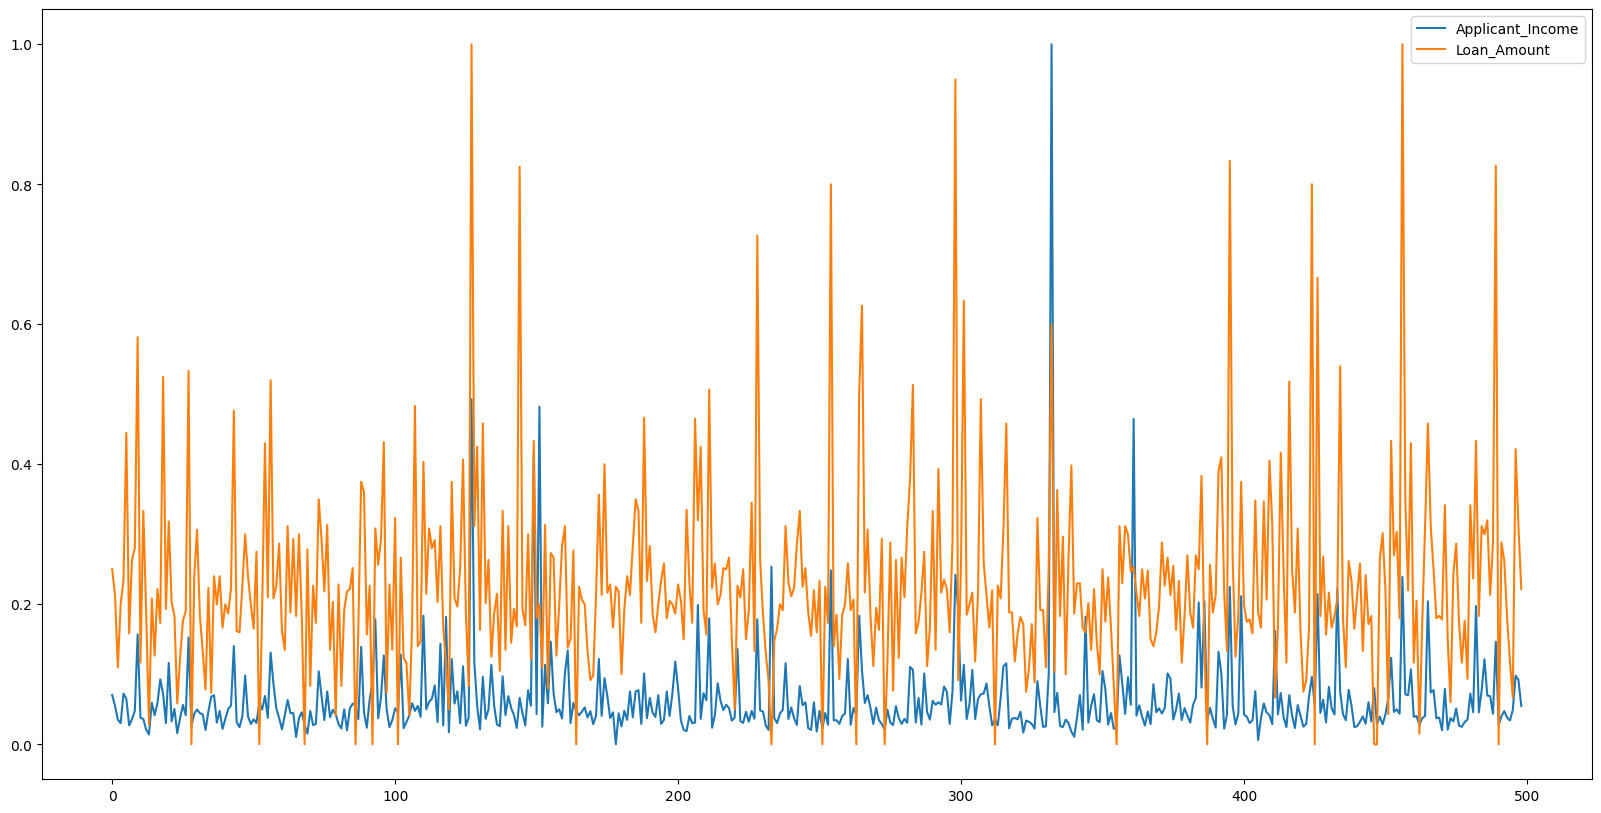

In [54]:
data_for_plot = df_normalised[['Applicant_Income', 'Loan_Amount']]
data_for_plot.plot(figsize=(20,10))

Obs: In general, the bigger the income, the bigger the requested loan amount.

### Histrograms

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Self_Employed'}>,
        <Axes: title={'center': 'Applicant_Income'}>],
       [<Axes: title={'center': 'Loan_Amount'}>,
        <Axes: title={'center': 'Credit_History'}>,
        <Axes: title={'center': 'Status'}>]], dtype=object)

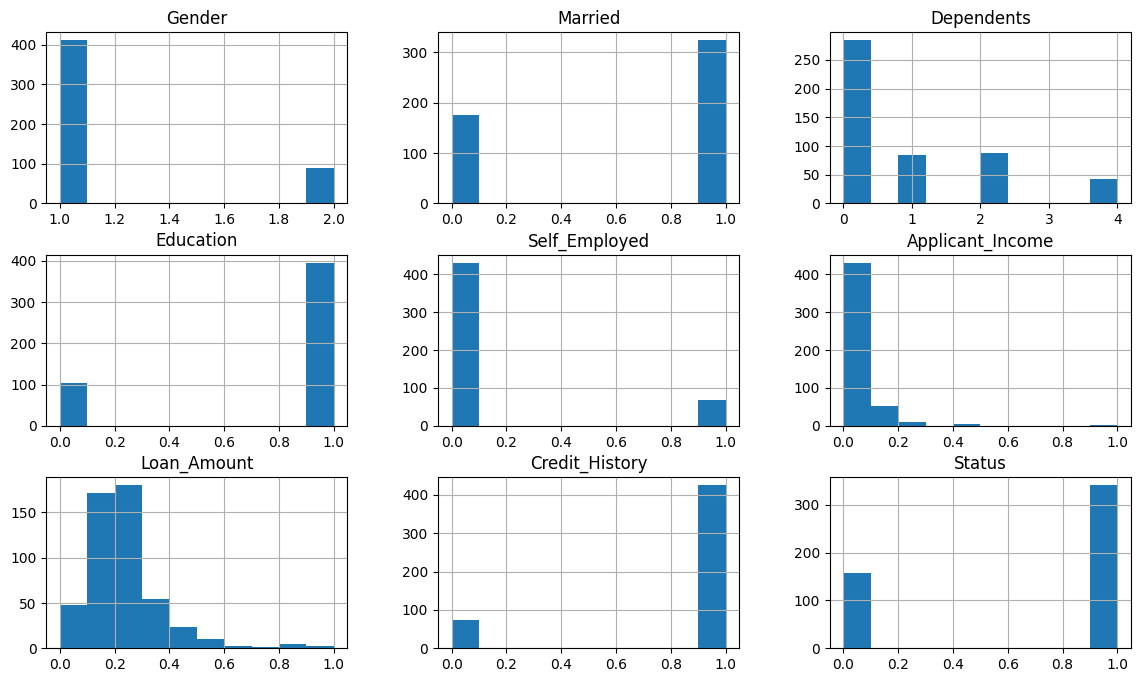

In [55]:
data_for_hist = df_normalised[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Loan_Amount', 'Credit_History', 'Status']]
data_for_hist.hist(figsize=(14,8))

Obs: A lot of disprepancy on categories representation.

### Scatter plots

Text(0.5, 0.98, 'Feature pairplot')

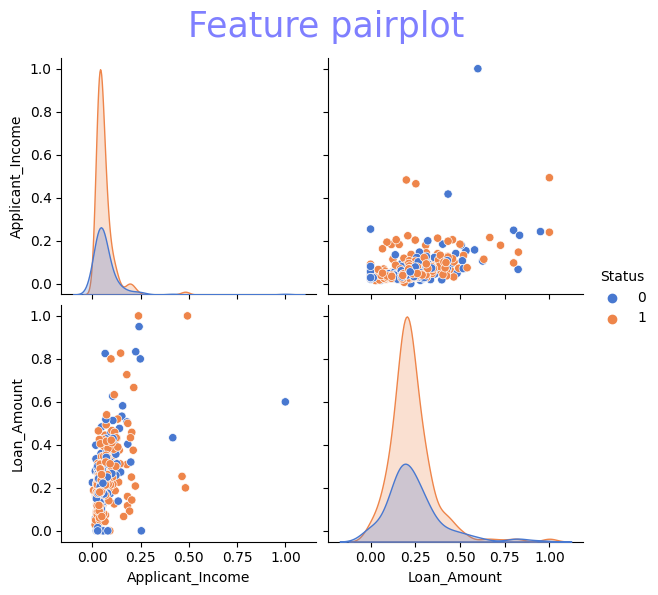

In [56]:
my_pairplot = sns.pairplot(df_normalised,hue='Status',palette="muted",height=3,vars=['Applicant_Income','Loan_Amount'],kind='scatter')
plt.subplots_adjust(top=0.9)
my_pairplot.fig.suptitle('Feature pairplot',fontsize=25,color='b',alpha=0.5)

### Correlation matrix

<Axes: >

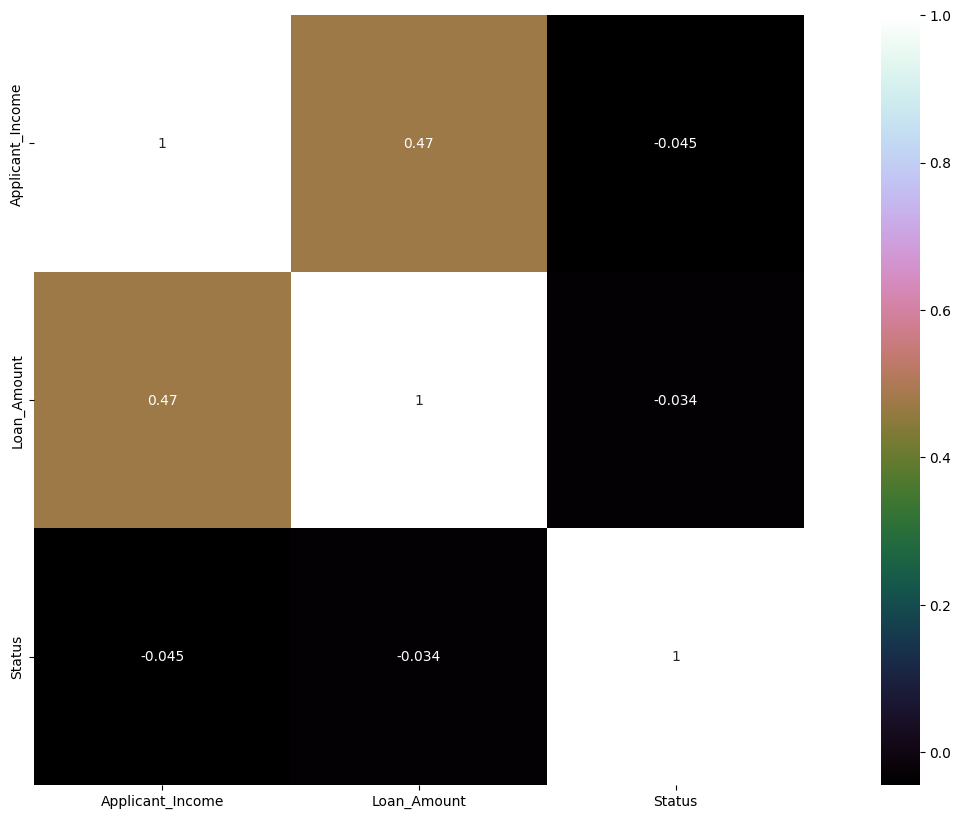

In [57]:
my_corr_matrix = df_normalised[['Applicant_Income', 'Loan_Amount', 'Status']].corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(my_corr_matrix,vmax=1,square=True,annot=True,cmap='cubehelix')

# Unsupervised learning

In [58]:
from sklearn.cluster import KMeans
from sklearn import metrics

#a dataset is selected for the clustering task, including 3 attributes from the normalized dataset
clustering_dataset = df_normalised[['Applicant_Income','Loan_Amount', 'Status']]

### K-means technique

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

[0.8511636432601883, 0.7086446166544011, 0.6624012578638223, 0.5603434104725814]


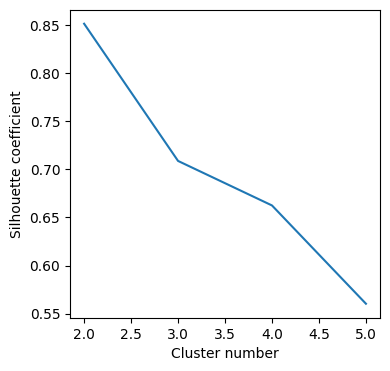

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

[0.8511636432601883, 0.7086446166544011, 0.6624012578638223, 0.5603434104725814]


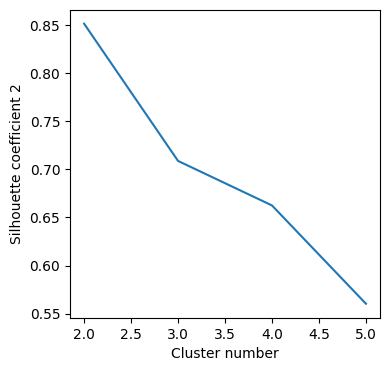

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

[0.8511636432601883, 0.7086446166544011, 0.6624012578638223, 0.5603434104725814]


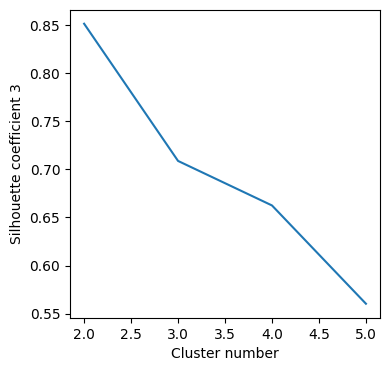

In [69]:

#Creating a list of silhouette coefficient values\n
Silhouette_coefficient = []
#a loop with 6 iterations is implemented (6 different values for the number of clusters)
# 1 cluster is not considered in this case because it is not meaningful to calculate the silhouette coefficient for 1 cluster
for i in range(2,6):
    #Creation of a K-means clustering model where the number of clusters (n_clusters) is equal to the loop iteration number (2, 3..) \n",
    kmeans_model = KMeans(n_clusters = i, init = "k-means++")
    #training of K-means model\n",
    kmeans_model.fit(clustering_dataset)
    #Calculating the Silhouette coeffcient\n",
    Silhouette_coefficient.append(metrics.silhouette_score(clustering_dataset, kmeans_model.labels_))
print(Silhouette_coefficient)
#representing the results visually
plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()


# Additional silhouette 
clustering_dataset2 = df_normalised[['Credit_History','Education', 'Status']]
Silhouette_coefficient2 = []
for i in range(2,6):
    #Creation of a K-means clustering model where the number of clusters (n_clusters) is equal to the loop iteration number (2, 3..) \n",
    kmeans_model = KMeans(n_clusters = i, init = "k-means++")
    #training of K-means model\n",
    kmeans_model.fit(clustering_dataset2)
    #Calculating the Silhouette coeffcient\n",
    Silhouette_coefficient2.append(metrics.silhouette_score(clustering_dataset2, kmeans_model.labels_))
print(Silhouette_coefficient)
#representing the results visually
plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient 2')
plt.show()


# Additional silhouette 
clustering_dataset3 = df_normalised[['Gender', 'Status']]
Silhouette_coefficient3 = []
for i in range(2,6):
    #Creation of a K-means clustering model where the number of clusters (n_clusters) is equal to the loop iteration number (2, 3..) \n",
    kmeans_model = KMeans(n_clusters = i, init = "k-means++")
    #training of K-means model\n",
    kmeans_model.fit(clustering_dataset3)
    #Calculating the Silhouette coeffcient\n",
    Silhouette_coefficient3.append(metrics.silhouette_score(clustering_dataset3, kmeans_model.labels_))
print(Silhouette_coefficient)
#representing the results visually
plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient 3')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


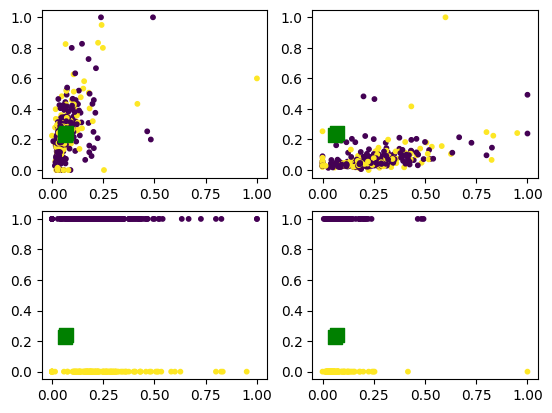

In [70]:
#a K-means model with 2 clusters is created and trained using the dataset with 3 features
kmeans_model = KMeans(n_clusters=2, init = "k-means++").fit(clustering_dataset)
#acquiring cluster centers,
centroids = kmeans_model.cluster_centers_
#make predictions for cluster membership of data objects
y_pred = kmeans_model.predict(clustering_dataset)
plt.subplot(2,2,1)# A 2 x 2 matrix of images is created, index starting with 1 in the top left corner
plt.scatter(clustering_dataset['Applicant_Income'], clustering_dataset['Loan_Amount'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,2)# Create the next image in the matrix with index 2
plt.scatter(clustering_dataset['Loan_Amount'], clustering_dataset['Applicant_Income'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,3)# Create the next image in the matrix with index 2
plt.scatter(clustering_dataset['Loan_Amount'], clustering_dataset['Status'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')
plt.subplot(2,2,4)# Create the next image in the matrix with index 2
plt.scatter(clustering_dataset['Applicant_Income'], clustering_dataset['Status'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,1], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,1], s = 100, c = 'g', marker = 's')

plt.show()

### Hierarchical clustering technique

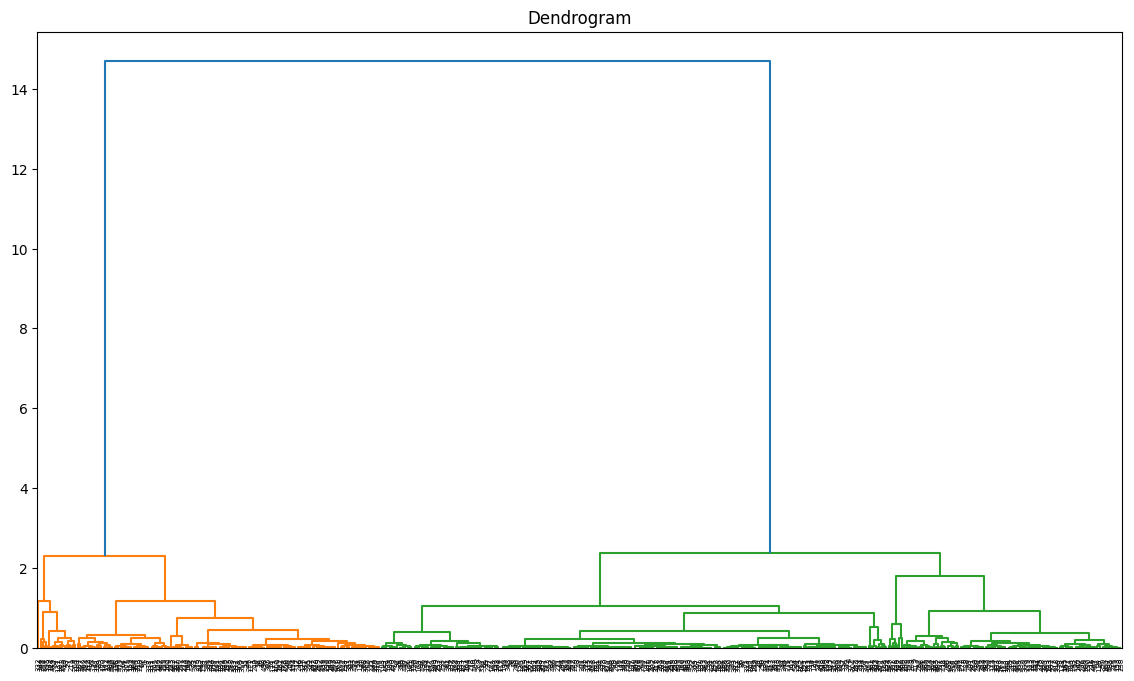

In [71]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
#creating an algorithm model, using a datset with 3 features
clustering = AgglomerativeClustering().fit(clustering_dataset)
#creating a dendrogramm using a linkage method "ward"
plt.figure(figsize =(14, 8))
plt.title('Dendrogram')
Dendrogram = shc.dendrogram((shc.linkage(clustering_dataset, method ='ward')))

# Supervised learning

### Artifical neural networks

In [62]:
#importing a library for splitting the dataset into test and training dataset
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
from sklearn.neighbors import KNeighborsClassifier


targets = clustering_dataset['Status']

#specifying the proportion of data objects that will form the training dataset (70%)
training_proportion = 0.7
#splitting the dataset into test and training sets using a random 70:30 split
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1.0 - training_proportion, random_state=42)
clustering_dataset.head(10)

,Applicant_Income,Loan_Amount,Status
0,0.070489,0.250000,1
1,0.054830,0.213333,0
2,0.035250,0.110000,1
3,0.030093,0.200000,1
4,0.072356,0.235000,1
5,0.065145,0.445000,1
6,0.027001,0.158333,1
7,0.035696,0.263333,0
8,0.047693,0.280000,1
9,0.156970,0.581667,0


#### Model 1 - 2 layers, 100 neurons each

Iteration 1, loss = 0.71830099
Iteration 2, loss = 0.63075640
Iteration 3, loss = 0.60289435
Iteration 4, loss = 0.60523508
Iteration 5, loss = 0.60210499
Iteration 6, loss = 0.60214826
Iteration 7, loss = 0.61033533
Iteration 8, loss = 0.60800098
Iteration 9, loss = 0.60672090
Iteration 10, loss = 0.60206752
Iteration 11, loss = 0.60198406
Iteration 12, loss = 0.60465890
Iteration 13, loss = 0.60097764
Iteration 14, loss = 0.60410143
Iteration 15, loss = 0.60107793
Iteration 16, loss = 0.60030207
Iteration 17, loss = 0.60246106
Iteration 18, loss = 0.60032566
Iteration 19, loss = 0.59936351
Iteration 20, loss = 0.60592567
Iteration 21, loss = 0.60231534
Iteration 22, loss = 0.61456321
Iteration 23, loss = 0.60205422
Iteration 24, loss = 0.59672407
Iteration 25, loss = 0.60073600
Iteration 26, loss = 0.59997618
Iteration 27, loss = 0.59518704
Iteration 28, loss = 0.59482977
Iteration 29, loss = 0.59986270
Iteration 30, loss = 0.59677034
Iteration 31, loss = 0.59305097
Iteration 32, los

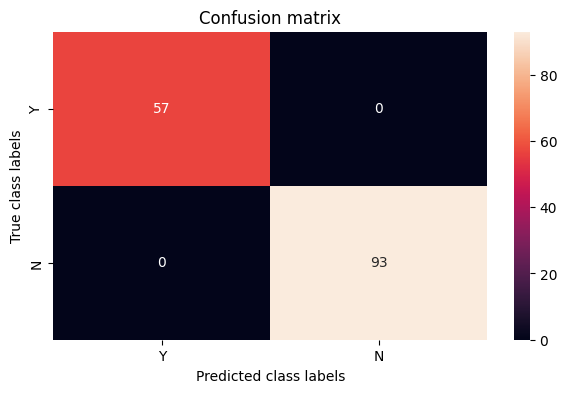

In [63]:
my_ann_model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)
my_ann_model.fit(X_train, y_train)

y_predictions = my_ann_model.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Status'].unique());
ax.yaxis.set_ticklabels(my_dataset['Status'].unique());

#### Model 2 - 1 layer with 5 neurons

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        93

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


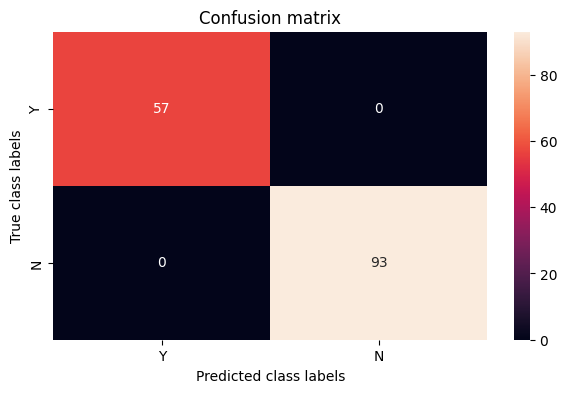

In [64]:
my_ann_model_2 = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
my_ann_model_2.fit(X_train, y_train)

#we use the trained model with a test set to obtain predictions
y_predictions_2 = my_ann_model_2.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_2, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_2)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Status'].unique());
ax.yaxis.set_ticklabels(my_dataset['Status'].unique());

#### Model 3 - 2 layers, with 25 and 60 neuros respectively

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        93

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


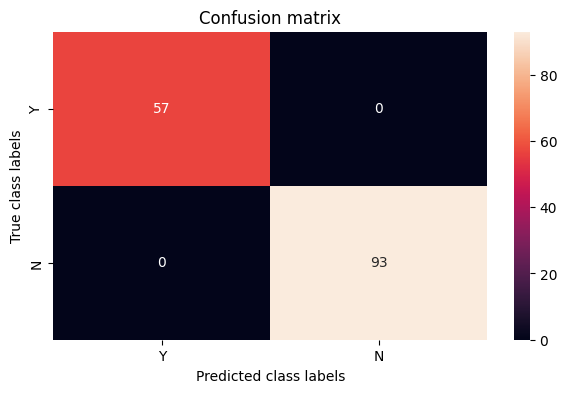

In [74]:
my_ann_model_3 = MLPClassifier(hidden_layer_sizes=(25, 60), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
my_ann_model_3.fit(X_train, y_train)

#we use the trained model with a test set to obtain predictions
y_predictions_3 = my_ann_model_3.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_3, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_3)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Status'].unique());
ax.yaxis.set_ticklabels(my_dataset['Status'].unique());

### kNN algorithm


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        93

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



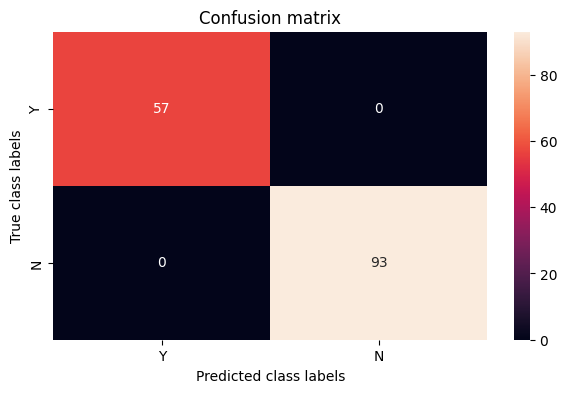

In [65]:
#a model with 5 neighbours is created
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Feed the training dataset to the model
KNN_MODEL.fit(X_train, y_train)

#we use the trained model with a test set to obtain predictions
y_predictions_knn = KNN_MODEL.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_knn, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_knn)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Status'].unique());
ax.yaxis.set_ticklabels(my_dataset['Status'].unique());

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        93

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



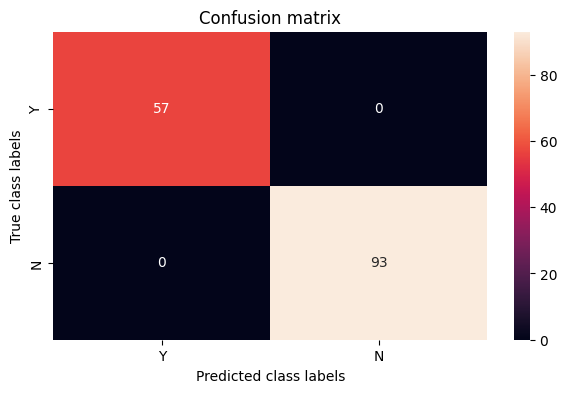

In [72]:
#a model with 3 neighbours is created
KNN_MODEL = KNeighborsClassifier(n_neighbors=3)
#Feed the training dataset to the model
KNN_MODEL.fit(X_train, y_train)

#we use the trained model with a test set to obtain predictions
y_predictions_knn = KNN_MODEL.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_knn, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_knn)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Status'].unique());
ax.yaxis.set_ticklabels(my_dataset['Status'].unique());

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        93

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



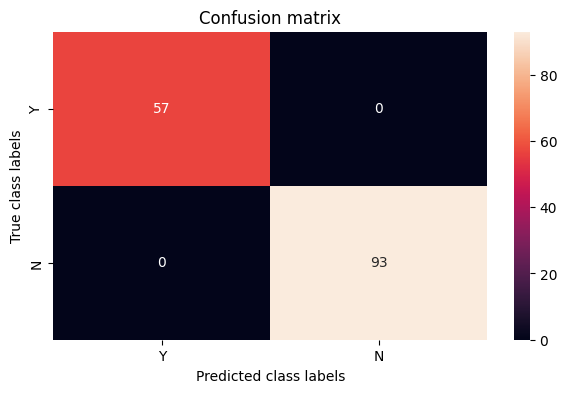

In [73]:
#a model with 2 neighbours is created
KNN_MODEL = KNeighborsClassifier(n_neighbors=2)
#Feed the training dataset to the model
KNN_MODEL.fit(X_train, y_train)

#we use the trained model with a test set to obtain predictions
y_predictions_knn = KNN_MODEL.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_knn, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_knn)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Status'].unique());
ax.yaxis.set_ticklabels(my_dataset['Status'].unique());